### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
color= sns.color_palette()
import matplotlib.pyplot as plt
import os
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')


### Import the dataset

In [2]:
Default= pd.read_csv('Default.csv')
Default.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


### Checking no. of variables and no. of observations

In [3]:
print('The number of rows(observations) is',Default.shape[0],"\n" 'The number of columns(variables)',Default.shape[1])

The number of rows(observations) is 10000 
The number of columns(variables) 4


 ## Descriptive Statistics for continuous variable

In [4]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


## Univariate Analysis - Balance and income variables

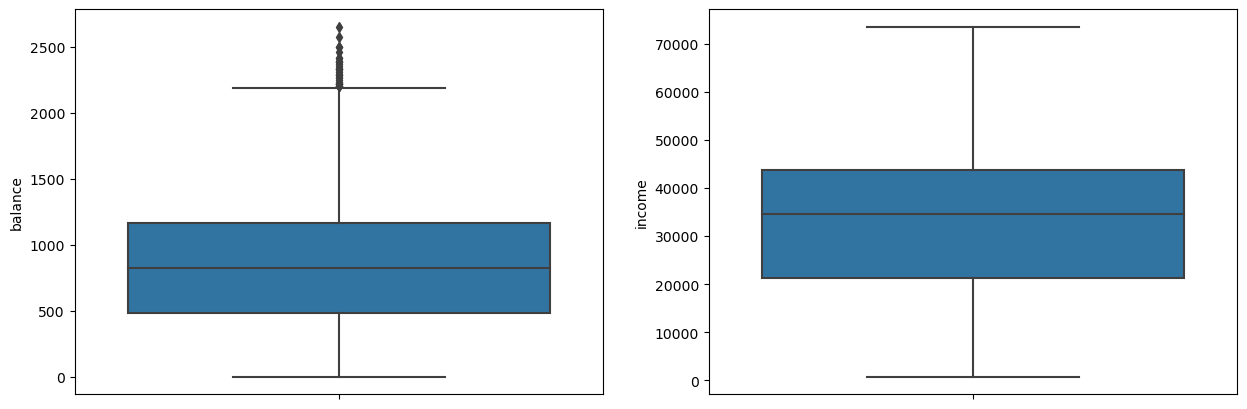

In [5]:
plt.figure(figsize=(15,5))

#For continuous variables - Boxplot
plt.subplot(1,2,1)
sns.boxplot(y= Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(y=Default['income'])
plt.show()

## Univariate Analysis - Students and Default variables

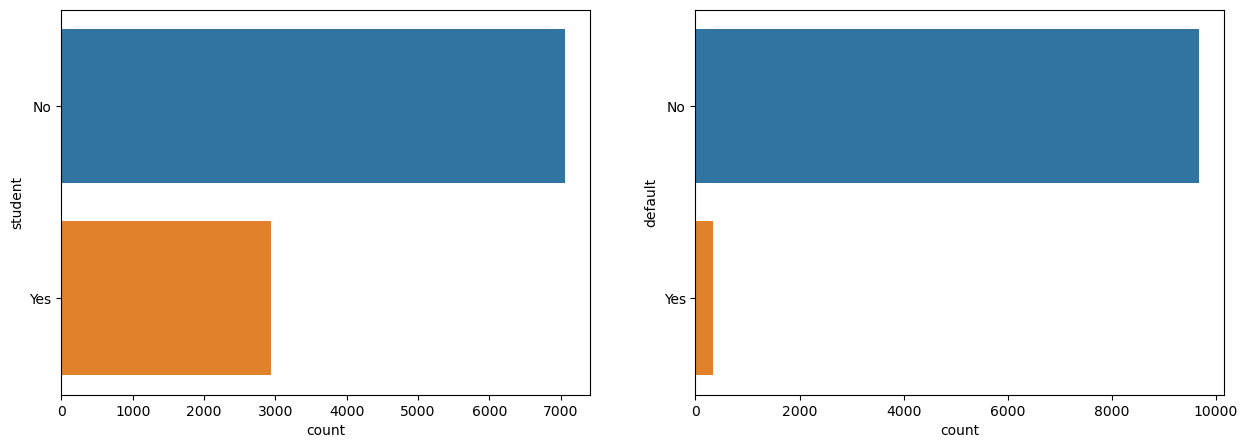

In [6]:
plt.figure(figsize=(15,5))

#For discrete variables - countplot
plt.subplot(1,2,1)
sns.countplot(y= Default['student'])

plt.subplot(1,2,2)
sns.countplot(y=Default['default'])
plt.show()

### Let's check the basis measures of descriptive stats for the categorical variables

In [7]:
Default['student'].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [8]:
Default['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

### Checking proportion of default

In [9]:
Default['default'].value_counts(normalize=True)

default
No     0.9667
Yes    0.0333
Name: proportion, dtype: float64

#### Data is imbalanced

## Bivariate Analysis - Default vs Other variables

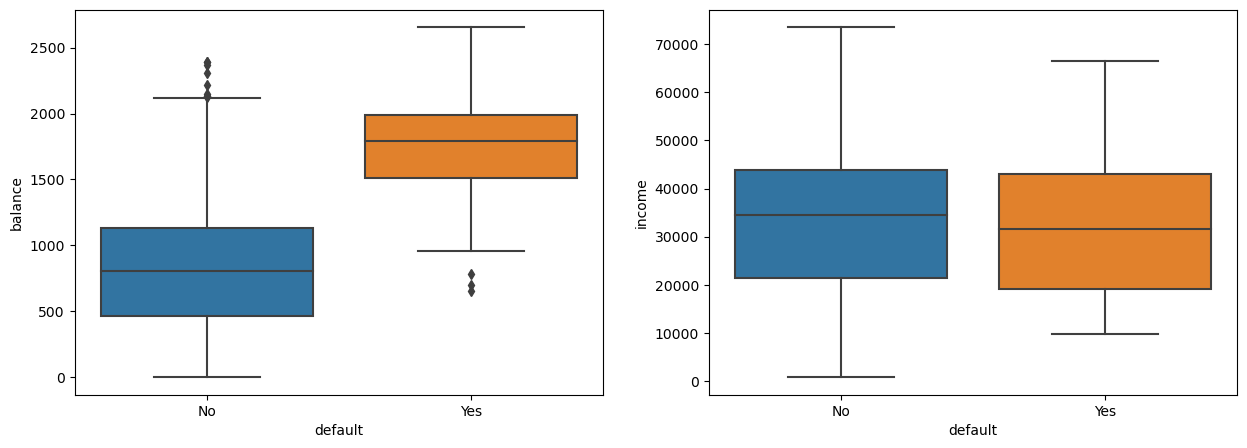

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=Default['default'],y=Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(x= Default['default'],y=Default['income'])

plt.show()

### Inference : 
- Defaulter seems to have higher outstanding balance compared non-defaulter
- Defaulter income seems lower than a non-defaulter

In [11]:
Default.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


In [12]:
Default['student'].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [13]:
pd.crosstab(Default['student'],Default['default'],normalize='index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


## Check for correlation between independent variables

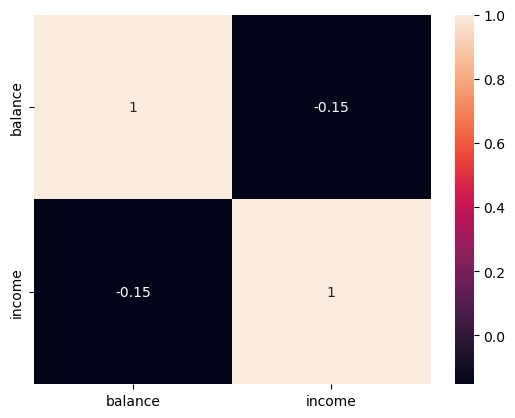

In [14]:
sns.heatmap(Default[['balance','income']].corr(),annot=True)
plt.show()

## Check for missing data

In [15]:
Default.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

### 
- There is no missing value

## Treating outliers present in the balance variable

In [16]:
Q1,Q3 = Default['balance'].quantile([.25,.75])
IQR= Q3-Q1
LL= Q1- 1.5*IQR
UL= Q3+ 1.5*IQR

In [17]:
df= Default[Default['balance']>UL]

In [18]:
df.head()

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23


In [19]:
print(Q1)
print(Q3)
print(IQR)
print(LL)
print(UL)

481.73249999999996
1166.305
684.5725000000001
-545.1262500000001
2193.16375


In [20]:
df1= Default[Default['balance']<LL]

In [21]:
df1.head()

,default,student,balance,income


In [22]:
df['default'].count()

31

In [23]:
df['default'].value_counts(normalize=True)

default
Yes    0.83871
No     0.16129
Name: proportion, dtype: float64

In [24]:
# Capping the Outliers

Default['balance']= np.where(Default['balance']>UL,UL,Default['balance'])

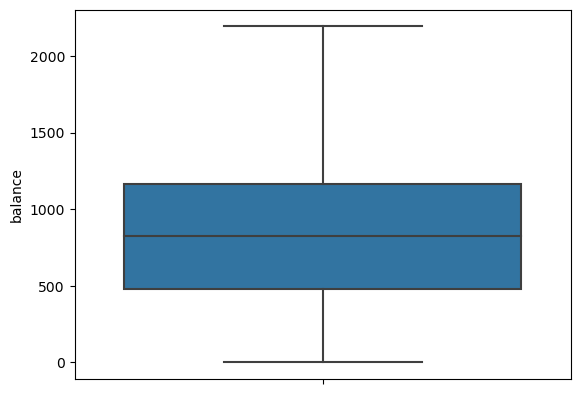

In [25]:
sns.boxplot(y=Default['balance'])
plt.show()

### Outlier have been replaced with capping/Transformation method - [upper limit]

# Credit Risk Modelling PD

### Transforming categorical variables into 1 & 0 using pandas get_dummies: OHE method 

In [26]:
Default.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


In [27]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

Default['default']= label_encoder.fit_transform(Default['default']) 
Default['student']= label_encoder.fit_transform(Default['student']) 

In [28]:
Default.head()

,default,student,balance,income
0,0,0,729.53,44361.63
1,0,1,817.18,12106.13
2,0,0,1073.55,31767.14
3,0,0,529.25,35704.49
4,0,0,785.66,38463.50


In [29]:
Default.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

## Splitting Train and test

In [30]:
X= Default.drop('default',axis=1)
y= Default['default']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

# Because the data is highly imbalanced and could possibly result into different proportions in the y variables between train and test set

In [32]:
print(y_train.value_counts(normalize=True).round(2))
print(y_test.value_counts(normalize=True).round(2))

default
0    0.97
1    0.03
Name: proportion, dtype: float64
default
0    0.97
1    0.03
Name: proportion, dtype: float64


# Treating target imbalance using SMOTE

In [33]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=42, sampling_strategy=0.75)
X_res,y_res= sm.fit_resample(X_train,y_train)

In [34]:
y_train.shape

(7000,)

In [35]:
y_res.shape

(11842,)

In [36]:
Default_smote= pd.concat([X_res,y_res],axis=1)

In [37]:
# Balance dataset SMOTE
Default_smote.groupby('default').mean()

,student,balance,income
default,,,
0,0.292153,806.157407,33530.996616
1,0.332611,1742.306625,31747.451695


In [38]:
# Imbalance dataset
Default.groupby('default').mean()

,student,balance,income
default,,,
0,0.291404,803.870400,33566.166610
1,0.381381,1736.593536,32089.146847


# Model Building using Logistic Regression for "Probability at default"

- The Equation of Logistic Regression by which we predict the corresponding probabilities and  then go on predict a discrete target variable is y= 1/(1+e^-z)

In [39]:
import statsmodels.formula.api as sm

## Creating Logistic Regression equation and sorting it in F_1

### model= SM.logit(formula= 'Dep_Variable ~ Summation(Independent Variable :k)', data= df containing required values).fit()
- It gives Hypothesis Testing Value P>|z|


In [40]:
train = pd.concat([X_train,y_train],axis=1)
train_smote= pd.concat([X_res,y_res],axis=1)
test= pd.concat([X_test,y_test],axis=1)

In [41]:
f_1= 'default~ balance + income + student'

### Fitting the Logistic Regression model on Imbalance dataset

In [42]:
model1= sm.logit(formula=f_1,data= train).fit()

Optimization terminated successfully.
         Current function value: 0.078096
         Iterations 10


In [43]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6996
Method:                           MLE   Df Model:                            3
Date:                Thu, 02 Nov 2023   Pseudo R-squ.:                  0.4650
Time:                        20:53:35   Log-Likelihood:                -546.67
converged:                       True   LL-Null:                       -1021.9
Covariance Type:            nonrobust   LLR p-value:                1.016e-205
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1161      0.591    -18.794      0.000     -12.275      -9.957
balance        0.0059      0.000     20.762      0.000       0.005       0.006
income      1.955e-06    9.6e-06      0.204      0.839   -1.69e-05    2.08e-05
student       -0.6003      0.277     -2.164      0.030      -1.144      -0.057
==============================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Validating the model on train set

In [44]:
y_pred_train= np.where(model1.predict(train)>0.5,1,0)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [46]:
confusion_matrix(y_train,y_pred_train)

array([[6740,   27],
       [ 156,   77]], dtype=int64)

In [47]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6767
           1       0.74      0.33      0.46       233

    accuracy                           0.97      7000
   macro avg       0.86      0.66      0.72      7000
weighted avg       0.97      0.97      0.97      7000



In [48]:
# Accuracy score is not a good measurement for a imbalanced dataset
accuracy_score(y_train,y_pred_train)

0.9738571428571429

### Validating the model on Test set

In [49]:
y_pred_test= np.where(model1.predict(test)>0.5,1,0)

In [50]:
confusion_matrix(y_test,y_pred_test)

array([[2882,   18],
       [  67,   33]], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2900
           1       0.65      0.33      0.44       100

    accuracy                           0.97      3000
   macro avg       0.81      0.66      0.71      3000
weighted avg       0.97      0.97      0.97      3000



In [52]:
# model is not over-fitting but the recall value is very poor. High Bias

### Fitting the model on balanced dataset

In [53]:
model2= sm.logit(formula=f_1, data= train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.243679
         Iterations 8


In [54]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                11842
Model:                          Logit   Df Residuals:                    11838
Method:                           MLE   Df Model:                            3
Date:                Thu, 02 Nov 2023   Pseudo R-squ.:                  0.6432
Time:                        20:53:35   Log-Likelihood:                -2885.6
converged:                       True   LL-Null:                       -8087.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.9970      0.238    -37.745      0.000      -9.464      -8.530
balance        0.0070      0.000     51.972      0.000       0.007       0.007
income     -1.098e-05   3.74e-06     -2.937      0.003   -1.83e-05   -3.65e-06
student       -1.1973      0.109    -10.969      0.000      -1.411      -0.983
==============================================================================
"""

In [55]:
y_pred_train_smote= np.where(model2.predict(train_smote)>0.5,1,0)

In [56]:
confusion_matrix(y_res,y_pred_train_smote)

array([[6085,  682],
       [ 563, 4512]], dtype=int64)

In [57]:
print(classification_report(y_res,y_pred_train_smote))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6767
           1       0.87      0.89      0.88      5075

    accuracy                           0.89     11842
   macro avg       0.89      0.89      0.89     11842
weighted avg       0.90      0.89      0.90     11842



In [58]:
accuracy_score(y_res,y_pred_train_smote)

0.8948657321398412

## Test Dataset

In [59]:
y_pred_test_smote= np.where(model2.predict(test)>0.5,1,0)

In [60]:
confusion_matrix(y_test,y_pred_test_smote)

array([[2607,  293],
       [  14,   86]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred_test_smote))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2900
           1       0.23      0.86      0.36       100

    accuracy                           0.90      3000
   macro avg       0.61      0.88      0.65      3000
weighted avg       0.97      0.90      0.92      3000



In [62]:
accuracy_score(y_test,y_pred_test_smote)

0.8976666666666666

# Conclusion

- we can see that we get better recall value after balancing the data.
- Hence, we prefer to go with model2